### Logistic Regression From Scratch 

Logistic regression is a generalized linear model that we can use to model or predict categorical outcome variables. 

In logistic regression, we're essentially trying to find the weights that maximize the likelihood of producing our given data. 

Since this maximizing the likelihood is an iterative process, I'll solve the optimization problem with gradient descent. 


In [1]:
## Import all required Packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
## Generating a simulated Data to build the Logistic Regression model

np.random.seed(20)
num_observations = 4000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))



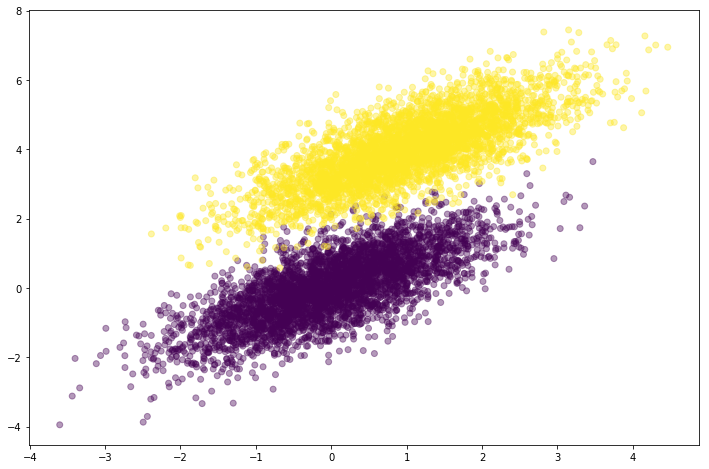

In [3]:
# Generating a Scatter Plot to see the distribution of two classes
plt.figure(figsize=(12,8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = simulated_labels, alpha = .4)

In [4]:
# We generally transform a Linear Model using link function. In case of Logistic Regression it is Sigmoid.

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

### Calculating the Log-Likelihood 
The log-likelihood can be viewed as as sum over all the training data. Mathematically,
$$\begin{equation}
ll = \sum_{i=1}^{N}y_{i}\beta ^{T}x_{i} - log(1+e^{\beta^{T}x_{i}})
\end{equation}$$
where $y$ is the target class, $x_{i}$ represents an individual data point, and $\beta$ is the weights vector.
I can easily turn that into a function and take advantage of matrix algebra.

In [5]:
# Calculating Log Likelihood Function

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    log_like = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return log_like

### Calculating the Gradient
Now I need an equation for the gradient of the log-likelihood. By taking the derivative of the equation above and reformulating in matrix form, the gradient becomes:
$$\begin{equation}
\bigtriangledown ll = X^{T}(Y - Predictions)
\end{equation}$$



In [6]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)

        # Update weights with gradient
            output_error_signal = target - predictions
            gradient = np.dot(features.T, output_error_signal)
            weights += learning_rate * gradient
        
        # Print log-likelihood every so often
            if step % 10000 == 0:
                print(log_likelihood(features, target, weights))
        
    return weights

In [7]:
weights = logistic_regression(simulated_features, simulated_labels,num_steps = 200000, 
                              learning_rate = 5e-5, add_intercept=True)

-3627.0378614370607
-145.13704643482237
-141.20695430642166
-140.38525494018268
-140.1478228291409
-140.06961998891688
-140.04211207726053
-140.03207880564221
-140.02834157323133
-140.02693199677572
-140.02639630766902
-140.02619178380678
-140.02611347541722
-140.0260834400475
-140.02607190743817
-140.0260674763237
-140.0260657730735
-140.02606511820278
-140.0260648663761
-140.02606476952806


In [8]:
data_with_intercept = np.hstack((np.ones((simulated_features.shape[0], 1)),
                                 simulated_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))


Accuracy from scratch: 0.992625


In [9]:
## Lets build Logistic Regression using Scikit to compare the acuuracy of the Logistic Regression we built above:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_features, simulated_labels)

print(clf.intercept_, clf.coef_)
print(weights)

[-12.44814453] [[-4.25350188  7.27446682]]
[-12.46832942  -4.26044081   7.28620483]


In [10]:
## Accuracy of Logistic Regression from Scikit:
print('Accuracy from sk-learn: {0}'.format(clf.score(simulated_features, simulated_labels)))

Accuracy from sk-learn: 0.992625


We can see that Scikit-Learn Logistic Regression and algorithm we built from scratch produces the same accuracy.
    
If I train my algorithm which I built from scratch using a small learning rate they would eventually match exactly, because gradient ascent on a concave function will always reach the global optimum, given enough time and sufficiently small learning rate.
    

Lets see as to why we have a slight reduction in accuracy. It may be due to mistakes  in classification  right 
in the boundary between the clusters. Let’s us plot and see what happened. 
 
In the following plot, purple points are correct predictions and yellow points are incorrect predictions.



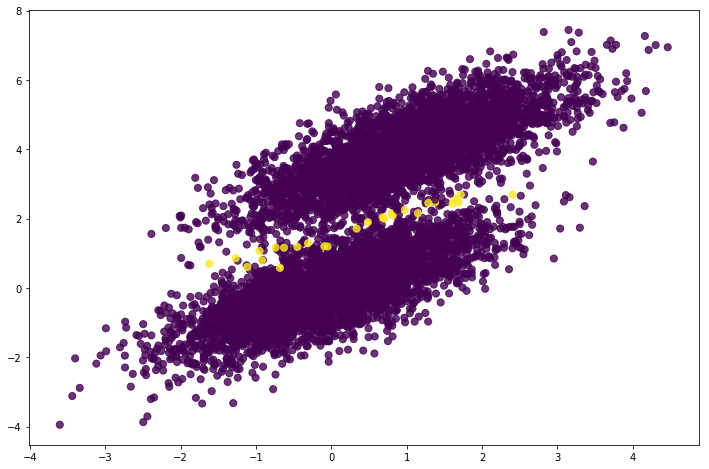

In [11]:

plt.figure(figsize = (12, 8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = preds == simulated_labels - 1, alpha = .8, s = 50)



From the above plot we can see that the Logistic Regression algorithm makes mistake near the boundary making some mistakes.

### Summary:
I built a logistic regression function from scratch and compared it with sk-learn’s logistic regression function. 
    
While both functions give essentially the same result, Logistic Regression we built is significantly slower because sklearn uses a highly optimized solver.